### 1. Text Preprocessing (텍스트 전처리)
설명) 모델이 텍스트를 이해하기 전에, 사람이 사용하는 언어를 기계가 처리하기 좋은 형태로 다듬는 과정이 필요합니다. 이를 텍스트 전처리라고 합니다. 여기서는 가장 기본적인 **토큰화(Tokenization)**와 **불용어 제거(Stopword Removal)**를 실습해 보겠습니다.

In [1]:
pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.2

In [2]:
# nltk 라이브러리 설치
# !pip install nltk

import nltk
from nltk.tokenize import word_tokenize

# 데이터 다운로드
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/dongwook/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dongwook/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
# 텍스트
text = "자연어 처리, 즉 NLP는 매우 흥미로운 연구 분야입니다. 컴퓨터가 인간의 언어를 이해하고 처리할 수 있도록 해줍니다."

# 1. 토큰화:
tokens = word_tokenize(text)
print("1. 원본 토큰:", tokens)

# 2. 불용어 제거:
stop_words = ['즉', '는', '가', '이', '을', '를', '의', '에', '들', '은', '입니다', '하고', '수', '있도록']
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

print("\n2. 직접 정의한 불용어:", sorted(list(stop_words)))
print("  기존 불용어 제거 후 토큰:", filtered_tokens)

# ----- 문제1) stop_words 리스트 빈칸 채우세요.
stop_words.extend(['분야', '연구'])

# 추가된 불용어 목록을 적용하여 다시 필터링
problem1_filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

print("'분야', '연구' 추가 후 결과:", problem1_filtered_tokens)


1. 원본 토큰: ['자연어', '처리', ',', '즉', 'NLP는', '매우', '흥미로운', '연구', '분야입니다', '.', '컴퓨터가', '인간의', '언어를', '이해하고', '처리할', '수', '있도록', '해줍니다', '.']

2. 직접 정의한 불용어: ['가', '는', '들', '를', '수', '에', '은', '을', '의', '이', '입니다', '있도록', '즉', '하고']
  기존 불용어 제거 후 토큰: ['자연어', '처리', 'NLP는', '매우', '흥미로운', '연구', '분야입니다', '컴퓨터가', '인간의', '언어를', '이해하고', '처리할', '해줍니다']
'분야', '연구' 추가 후 결과: ['자연어', '처리', 'NLP는', '매우', '흥미로운', '분야입니다', '컴퓨터가', '인간의', '언어를', '이해하고', '처리할', '해줍니다']


#### ✅ 문제1) 위 코드의 stop_words에 **'분야', '연구'**를 추가하여 불용어로 처리한 후, 결과가 어떻게 달라지는지 확인해보세요. (기존 결과와 불용어 처리 후 결과와 비교해 진행해보기)

#### ✅ 문제2) 토큰화 결과에 포함된 ','나 '.' 같은 구두점들이 불용어 제거 과정에서 어떻게 처리되었나요? 그 이유는 무엇일까요?

### 답: isalnum()은 해당 문자열이 알파벳 또는 숫자로만 구성되어 있는지를 확인하는 메서드입니다.  따라서 구두점은 모두 제거됩니다.

### 2. N-gram
설명) N-gram은 텍스트에서 연속된 n개의 단어 뭉치를 의미합니다. N-gram은 문맥을 파악하는 간단하면서도 효과적인 방법입니다. 1-gram은 유니그램(unigram), 2-gram은 바이그램(bigram), 3-gram은 트라이그램(trigram)이라고도 부릅니다.

In [ ]:
def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# 시작 문장 (수정 대상)
sentences = [
  "오늘 날씨가 정말 좋네요.",
  "저는 아침에 커피를 마십니다.",
  "주말에 친구를 만나기로 했어요.",
  "퇴근하고 집에 가는 길입니다.",
  "오늘 저녁 메뉴는 무엇인가요?"
]

# 초기 N-gram 개수 확인
initial_bigrams = sum(len(generate_ngrams(s, 2)) for s in sentences)
initial_trigrams = sum(len(generate_ngrams(s, 3)) for s in sentences)

print(f"Initial Bigram Count: {initial_bigrams}")   # 기존 결과: 15
print(f"Initial Trigram Count: {initial_trigrams}") # 기존 결과: 10

15 10
Initial Bigram Count: 15
Initial Trigram Count: 10


#### ✅ 문제1 ) 아래 sentences 배열의 문장들을 수정하거나 새로운 문장을 추가하여, 전체 2-gram의 수가 25개 이상, 3-gram의 수가 15개 이상이 되도록 만들어보세요.

In [4]:
def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# 시작 문장 (수정 대상)
sentences = [
  "오늘 날씨가 정말 좋네요.",
  "저는 아침에 커피를 마십니다.",
  "주말에 친구를 만나기로 했어요.",
  "퇴근하고 집에 가는 길입니다.",
  "오늘 저녁 메뉴는 무엇인가요?",
    "내일은 비가 올 것 같아요.",
    "이번 주말에는 산책을 갈 예정입니다.",
    "저녁 식사 후에 영화를 볼 거예요.",
]

# 초기 N-gram 개수 확인
initial_bigrams = sum(len(generate_ngrams(s, 2)) for s in sentences)
initial_trigrams = sum(len(generate_ngrams(s, 3)) for s in sentences)

print(f"Initial Bigram Count: {initial_bigrams}")   # 기존 결과: 15
print(f"Initial Trigram Count: {initial_trigrams}") # 기존 결과: 10

Initial Bigram Count: 28
Initial Trigram Count: 20


#### ✅ 문제2) N-gram 모델은 간단하지만 한계가 있습니다. 예를 들어, "강아지가 고양이를 좋아해"와 "고양이가 강아지를 좋아해"는 1-gram의 구성과 빈도는 같지만 의미는 다릅니다. 이처럼 N-gram이 문장의 구조적, 의미적 정보를 완전히 파악하기 어려운 이유는 무엇일까요?

## 답: N-gram 모델은 순서와 위치 정보를 충분히 반영하지 못하기 때문입니다. 예를 들어, 1-gram은 단어의 빈도만 고려하고, 2-gram이나 3-gram도 짧은 범위나 단어 조합만 볼 수 있습니다. 따라서 문장 전체의 구조나 단어 사이의 거리가 먼 경우 문맥적 의미를 제대로 파악하기 힘듭니다.

### 3. Word Embedding (워드 임베딩)
1. Word2Vec
설명) Word2Vec은 단어를 벡터 공간에 표현하는 기법입니다. 단어의 의미적 유사성을 벡터 간의 기하학적 관계로 나타낼 수 있으며, "왕 - 남자 + 여자 = 여왕"과 같은 유추가 가능해집니다.

In [6]:
import gensim
import gensim.downloader as api

model_w2v = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [7]:
# "한국에서 서울을 뺀 벡터에 도쿄를 더하면 어떤 단어와 가장 가까울까?"
result = model_w2v.most_similar(positive=['Korea', 'Tokyo'], negative=['Seoul'], topn=1)
print(f"'Korea' - 'Seoul' + 'Tokyo' ≈ '{result[0][0]}'")

# 'computer'와 가장 유사한 단어들은?
similar_words = model_w2v.most_similar('computer', topn=5)
print("\nWords similar to 'computer':", similar_words)

# 관계가 맞지 않는 단어 찾기
odd_one_out = model_w2v.doesnt_match(["apple", "banna", "lemon", "car"])
print(f"\nWhich word does not belong in ['apple', 'banana', 'lemon', 'car']? -> '{odd_one_out}'")

'Korea' - 'Seoul' + 'Tokyo' ≈ 'Japan'

Words similar to 'computer': [('computers', 0.7979379296302795), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868), ('Computer', 0.647333562374115), ('com_puter', 0.6082080006599426)]

Which word does not belong in ['apple', 'banana', 'lemon', 'car']? -> 'car'


#### **위 코드를 수정하여 문제1 ~ 문제3까지 진행하세요!**

#### ✅ 문제1) 'Korea' - 'Seoul' + 'Tokyo' ≈ ?

위 유추식의 결과로 어떤 단어가 나올지 예상해보고, 코드를 수정하여 확인해보세요.

#### ✅ 문제2) model_w2v.most_similar() 함수를 사용해 'computer'과 가장 유사한 단어 5개를 찾아보세요.

#### ✅ 문제3) model_w2v.doesnt_match() 함수에 ["apple", "banana", "lemon", "car"] 리스트를 넣어 어떤 단어가 가장 이질적인지 확인해보세요.

### 4. GloVe (Global Vectors for Word Representation)
설명) GloVe는 Word2Vec과 유사한 임베딩 기법이지만, 전체 단어의 동시 등장 통계(Global Co-occurrence Statistics) 정보를 함께 활용하여 학습하는 점이 특징입니다.

In [8]:
model_glove = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [10]:
result = model_glove.most_similar(positive=['doctor', 'court'], negative=['hospital'], topn=1)
print(f"'doctor' - 'hospital' + 'court' ≈ '{result[0][0]}'")

result = model_glove.most_similar(positive=['man', 'queen'], negative=['king'], topn=1)
print(f"'man' - 'king' + 'queen' ≈ '{result[0][0]}'")

'doctor' - 'hospital' + 'court' ≈ 'judge'
'man' - 'king' + 'queen' ≈ 'woman'


#### ✅ 문제1) 'man' - 'king' + 'queen' ≈ ?  (위 코드를 수정해서 진행하시면 됩니다.)

위 유추식의 결과로 어떤 단어가 나올지 GloVe 모델로 확인해보세요. Word2Vec과 결과가 비슷한가요?

#### ✅ 문제2) Word2Vec과 GloVe는 각각 다른 방식으로 단어 벡터를 학습합니다. Word2Vec은 주변 단어를 예측하는 과정에서, GloVe는 전체 단어 동시 등장 확률을 기반으로 학습합니다. 두 방법의 차이점이 어떤 결과의 차이를 만들어낼 수 있을지 생각해보세요.

## 답: Word2Vec은 문맥에 따라 단어의 의미를 더 잘 반영하지만, 빈도수가 낮은 단어 쌍의 관계는 잘 학습하지 못합니다. 그에 반해 GloVe는 전체적인 단어 관계를 더 잘 포착하지만, 세부적인 문맥 변화에는 덜 민감할 수 있습니다.

### 5. Sequence Models (RNN의 한계)
설명 ) RNN(순환 신경망)은 시퀀스 데이터 처리에 강점을 갖지만, 시퀀스가 길어질수록 앞쪽의 정보가 뒤쪽으로 전달되기 어려운 **장기 의존성 문제(Long-term Dependency Problem)**라는 구조적 한계를 가집니다. 이는 Transformer와 Attention이 등장하게 된 중요한 배경이 됩니다.

#### ✅ 문제 1)

아래와 같은 문장이 있다고 가정해봅시다.

**"오늘 아침 회의에 참석했던, 어제 캐나다에서 막 돌아온 우리 팀의 김 대리는 그 프로젝트의 핵심 담당자이다."**

이 문장에서 마지막 단어인 '담당자이다'는 문장 맨 앞의 '김 대리'와 가장 밀접한 관련이 있습니다. RNN이 이처럼 멀리 떨어진 단어 간의 관계를 파악하기 어려운 이유는 무엇일까요? (Vanishing Gradient(기울기 소실) 관점에서 간단히 설명해보세요.)

## 답: RNN은 입력 시퀀스를 한 단계씩 처리하면서, 각 단계의 정보를 다음 단계로 전달합니다. 문장이 길어질수록 앞쪽 정보가 뒤쪽까지 전달되려면 여러 번의 반복적인 연산을 거쳐야 합니다. 이 과정에서 역전파를 통해 가중치가 업데이트되는데, 반복적으로 곱셈이 이루어지면 기울기(gradient)가 점점 작아져 0에 가까워지는 기울기 소실 문제가 발생합니다. 따라서 앞쪽 정보가 뒤쪽으로 갈수록 거의 전달되지 않게 되어, RNN은 멀리 떨어진 단어들 사이의 관계를 잘 학습하지 못합니다.

### 6. Attention, Transformer

1. . Transformer 구조
Query, Key, Value 소개

Attention 메커니즘은 Query(쿼리), Key(키), Value(값) 라는 세 가지 개념을 사용해 문장 내 단어 간의 관계 가중치를 계산합니다. 도서관에서 책을 찾는 것에 비유할 수 있습니다.

Query: 내가 찾고 싶은 정보

Key: 각 책의 주제나 제목

Value: 책의 실제 내용

Attention은 내 Query와 가장 관련성이 높은 Key(유사도 계산)를 찾고, 해당 Key에 연결된 Value(실제 내용)를 더 많이 가져오는 방식으로 동작합니다. Self-Attention에서는 이 세 가지가 모두 같은 문장 내 단어들로부터 나옵니다.

💻 Self-Attention 실습

Attention weights for the query 'it':
The: 0.0736
animal: 0.0863
didn't: 0.0679
cross: 0.0908
the: 0.0838
street: 0.0711
because: 0.0981
it: 0.2210
was: 0.0899
too: 0.0545
tired: 0.0630


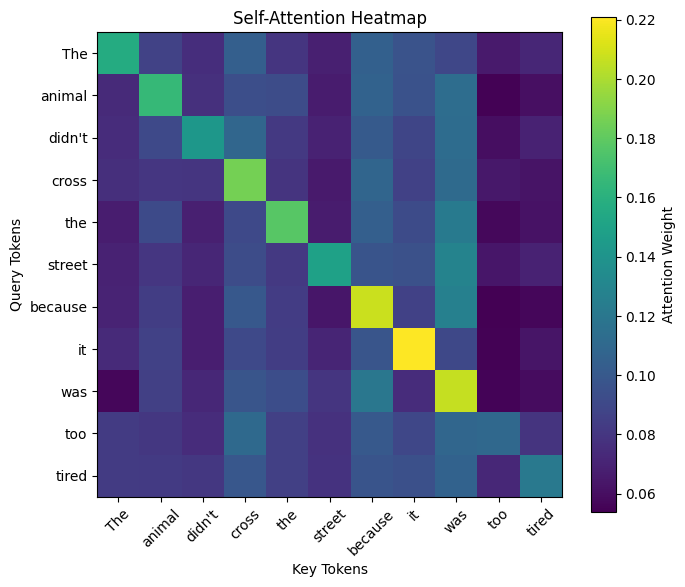

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Attnetion 점수를 확률값으로 변환하는 역할
def softmax(x, axis=-1):
    exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

# 문장: "그 동물은 길을 건너지 않았다. 왜냐하면 그것(it)이 너무 피곤했기 때문이다."
tokens = "The animal didn't cross the street because it was too tired".split()

# 임의의 임베딩 생성 (실제로는 학습된 임베딩 사용)
# 각 단어(토큰)를 64차원의 벡터로 표현
embedding_dim = 64
np.random.seed(42)
X = np.random.rand(len(tokens), embedding_dim)

Q, K, V = X, X, X
d_k = K.shape[-1]

# Attention 점수 계산
scores = np.dot(Q, K.T) / np.sqrt(d_k)
attention_weights = softmax(scores)

# 'it'이 Query일 때의 Attention 가중치 출력
it_index = tokens.index('it')
it_attention = attention_weights[it_index]

print("Attention weights for the query 'it':")
for token, weight in zip(tokens, it_attention):
    print(f"{token}: {weight:.4f}")

# Heatmap 시각화
plt.figure(figsize=(7, 6))
plt.imshow(attention_weights, cmap='viridis')
plt.colorbar(label='Attention Weight')
plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=45)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.title("Self-Attention Heatmap")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.tight_layout()
plt.show()

#### ✅ 문제1) 위 코드의 실행 결과(Attention 가중치)와 히트맵을 확인하세요. Query가 'it'일 때, 'animal'과 'street' 중 어떤 Key의 가중치(Attention Score)가 더 높게 나왔나요? (실행 시마다 결과는 다를 수 있지만 일반적인 경향성을 보세요.)

## 답: animal

#### ✅ 문제2) Self-Attention은 왜 RNN의 장기 의존성 문제를 해결할 수 있을까요? (계산 방식의 차이점을 생각해보세요.)

## 답: RNN은 정보를 순차적으로 전달하고 앞쪽 정보가 뒤쪽까지 전달되는 과정에서 여러 단계를 거치기 때문에 장기 의존성 문제가 발생합니다. 그에 반해, Self-Attention은 문장 내 모든 단어 쌍의 관계를 한 번에 계산합니다. 따라서 각 단어가 다른 모든 단어와 연결되어 계산되어 멀리 떨어진 단어들 사이의 정보도 쉽게 전달되므로 장기 의존성 문제를 해결할 수 있습니다.

####💻 Masked Self-Attention (디코더) 실습
설명) Transformer의 디코더는 다음 단어를 예측하는 역할을 합니다. 이때, 정답을 미리 보고 예측하는 것을 방지하기 위해 현재 예측하려는 위치보다 뒤에 있는 단어들을 가리는 마스킹(Masking) 과정이 필요합니다.

In [12]:
# 5x5 크기의 임의의 Attention 점수 행렬 생성
np.random.seed(42)
scores = np.random.rand(5, 5)
print("Original Scores:\n", np.round(scores, 2))

# 마스크 생성
mask = np.triu(np.ones((5, 5)), k=1).astype('bool')

# 마스킹 적용 (마스킹된 점수에 Softmax를 적용)
scores[mask] = -np.inf
print("\nMasked Scores:\n", np.round(scores, 2))

# Softmax 적용 후 결과
attention_weights = softmax(scores, axis=-1)
print("\nAttention Weights after Masking and Softmax:\n", np.round(attention_weights, 2))

Original Scores:
 [[0.37 0.95 0.73 0.6  0.16]
 [0.16 0.06 0.87 0.6  0.71]
 [0.02 0.97 0.83 0.21 0.18]
 [0.18 0.3  0.52 0.43 0.29]
 [0.61 0.14 0.29 0.37 0.46]]

Masked Scores:
 [[0.37 -inf -inf -inf -inf]
 [0.16 0.06 -inf -inf -inf]
 [0.02 0.97 0.83 -inf -inf]
 [0.18 0.3  0.52 0.43 -inf]
 [0.61 0.14 0.29 0.37 0.46]]

Attention Weights after Masking and Softmax:
 [[1.   0.   0.   0.   0.  ]
 [0.52 0.48 0.   0.   0.  ]
 [0.17 0.44 0.39 0.   0.  ]
 [0.21 0.23 0.29 0.27 0.  ]
 [0.25 0.16 0.18 0.2  0.21]]


#### ✅ 문제1) 마지막으로 출력된 Attention Weights 행렬을 보세요. 각 행(Query)은 왜 자기 자신과 그 이전 위치(Key)에만 0이 아닌 가중치를 가지나요?



## 답: 마스킹때문에 그렇습니다. 디코더에서 아직 생성되지 않은 단어를 참고하지 못하도록 현재 위치보다 뒤에 있는 key는 mask합니다. 따라서 Softmax를 적용하면 자기 자신과 그 이전 위치에만 0이 아닌 가중치가 나오게 됩니다.

#### ✅ 문제2) 번역 모델이 "나는 학생입니다"를 순서대로 생성할 때, '학생'을 예측하는 시점에서 정답인 '입니다'를 미리 참고하지 못하게 막는 것이 왜 중요한가요? 이 마스킹의 역할과 연관지어 설명해보세요.

## 답: '학생'을 예측할 때 '입니다'를 미리 참고하면 모델이 실제로 다음에 올 단어를 예측하는 것이 아니라, 정답을 미리 참고해버리게 됩니다. 마스킹은 이런 미래 정보를 가려서 모델이 오직 현재까지 생성된 단어만 보고 다음 단어를 예측하도록 유도하는 역할을 합니다.

## 문제는 여기까지 입니다. 수고하셨습니다 :)